<a href="https://colab.research.google.com/github/prashsub/AccountingForValuation/blob/master/Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valuation using Fundamental Analysis using Pandas

## This notebook is based on the book "Accounting for Value by Stephen H. Penman"

This notebook performs fundamental valuation of stocks and tries to calculate a value of the stock based on it's publicly reported numbers in Form 10K



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
!pip install --upgrade --quiet gspread

In [0]:
from google.colab import auth


import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Set Risk Free Rate

In [0]:
#Risk Free Rate + Equity Premium
rfr_equity = 0.06

#Estimated Growth over next year
growth_next_year = 0.0

wb = gc.open('MANH')

# Data importing from Google Sheets

Source Data from the following sources:

1. Sheet 1 - simfin.com
2. Sheet 2 - Yahoo Finance Historical Data
3. Sheet 3 - stockrow.com

Tickers Available:

AMAT
PM
NATI
CODI

SLB

NVDA

STZ
DIS
QCOM
AMZN
CMCSA
NWS
HPQ
CTAS

V - OVervalued - reconsider at 100-120

SBUX
AAPL
MCD

MDT Overvalued - reconsider at 70

MO

March 2020 Updates

AMAT - At Value at around 37

SLB - Undervalued - right value at about $37

NVDA - Overvalued - right value at about 175

STZ - Overvalued

DIS - 

QCOM

AMZN

CMCSA - At Value

NWS

HPQ

CTAS

V - Overvalued - consider at 120 again

SBUX - Overvalued

AAPL - overcalued - consider at 200 again

McD - Overvalued - Consider once it drops below 135

In [0]:
sheet = wb.worksheet("Sheet1") #10K
sheet2 = wb.worksheet("Sheet2") #Historical Prices 
sheet3 = wb.worksheet("Sheet3") #Various Metrics

In [0]:
# get_all_values gives a list of rows.
rows = sheet.get_all_values()
rows2 = sheet2.get_all_values()
rows3 = sheet3.get_all_values()
#print(rows)

In [0]:
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

In [0]:
df = pd.DataFrame.from_records(rows, coerce_float=True)
df.dropna(how='all', inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Data provided by SimFin,,,,,,,,,,,
1,,,,,,,,,,,,
2,Profit & Loss statement,,,,,,,,,,,
3,,in million USD,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
4,,Revenue,297,329,376,415,492,556,605,595,559,618


In [0]:
#Making First Row Header
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

,Data provided by SimFin,,,,,,,,,,,
1,,,,,,,,,,,,
2,Profit & Loss statement,,,,,,,,,,,
3,,in million USD,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
4,,Revenue,297,329,376,415,492,556,605,595,559,618
5,,Cost of revenue,-129,-139,-162,-181,-213,-235,-250,-246,-241,-285


In [0]:
index_PL = df.loc[ df["Data provided by SimFin"] == 'Profit & Loss statement'].index[0]
print(index_PL)

2


In [0]:
index_BS = int(df.loc[df['Data provided by SimFin']=='Balance Sheet'].index[0])
index_CF = int(df.loc[df['Data provided by SimFin']=='Cash Flow statement'].index[0])

print(index_BS)
print(index_CF)

16
43


In [0]:
df_PL = df.copy(deep=True)
df_PL = df_PL.iloc[index_PL:index_BS-2, 1:]
print(df_PL)

0                                                        ...                
3                                in million USD  FY '10  ...  FY '18  FY '19
4                                       Revenue     297  ...     559     618
5                               Cost of revenue    -129  ...    -241    -285
6                                  Gross Profit     168  ...     318     333
7                            Operating Expenses    -126  ...    -184    -217
8                       Operating Income (Loss)      42  ...     134     116
9                   Non-Operating Income (Loss)       0  ...       2       0
10               Pretax Income (Loss), Adjusted      42  ...     136     116
11                      Abnormal Gains (Losses)          ...                
12                         Pretax Income (Loss)      42  ...     136     116
13            Income Tax (Expense) Benefit, net     -14  ...     -32     -30
14  Net Income Available to Common Shareholders      28  ...     105      86

In [0]:
#Making First Row Header
new_header = df_PL.iloc[0] #grab the first row for the header
df_PL = df_PL[1:] #take the data less the header row
df_PL.columns = new_header #set the header row as the df header
df_PL

3,in million USD,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
4,Revenue,297,329,376,415,492,556,605,595,559,618
5,Cost of revenue,-129,-139,-162,-181,-213,-235,-250,-246,-241,-285
6,Gross Profit,168,190,215,233,280,321,355,349,318,333
7,Operating Expenses,-126,-131,-134,-132,-152,-159,-160,-160,-184,-217
8,Operating Income (Loss),42,59,80,101,127,161,194,189,134,116
9,Non-Operating Income (Loss),0,2,1,2,1,1,2,-1,2,0
10,"Pretax Income (Loss), Adjusted",42,61,81,103,128,163,196,188,136,116
11,Abnormal Gains (Losses),,3,,,,,,-3,,
12,Pretax Income (Loss),42,63,81,103,128,163,196,185,136,116
13,"Income Tax (Expense) Benefit, net",-14,-18,-29,-36,-46,-59,-72,-68,-32,-30


In [0]:
df_PL.set_index("in million USD",inplace=True)
df_PL

3,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
in million USD,,,,,,,,,,
Revenue,297,329,376,415,492,556,605,595,559,618
Cost of revenue,-129,-139,-162,-181,-213,-235,-250,-246,-241,-285
Gross Profit,168,190,215,233,280,321,355,349,318,333
Operating Expenses,-126,-131,-134,-132,-152,-159,-160,-160,-184,-217
Operating Income (Loss),42,59,80,101,127,161,194,189,134,116
Non-Operating Income (Loss),0,2,1,2,1,1,2,-1,2,0
"Pretax Income (Loss), Adjusted",42,61,81,103,128,163,196,188,136,116
Abnormal Gains (Losses),,3,,,,,,-3,,
Pretax Income (Loss),42,63,81,103,128,163,196,185,136,116


In [0]:
df_PL.fillna(0, inplace=True)
df_PL.replace(',','', regex=True, inplace=True)
df_PL.replace('',0, inplace=True)
df_PL

3,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
in million USD,,,,,,,,,,
Revenue,297,329,376,415,492,556,605,595,559,618
Cost of revenue,-129,-139,-162,-181,-213,-235,-250,-246,-241,-285
Gross Profit,168,190,215,233,280,321,355,349,318,333
Operating Expenses,-126,-131,-134,-132,-152,-159,-160,-160,-184,-217
Operating Income (Loss),42,59,80,101,127,161,194,189,134,116
Non-Operating Income (Loss),0,2,1,2,1,1,2,-1,2,0
"Pretax Income (Loss), Adjusted",42,61,81,103,128,163,196,188,136,116
Abnormal Gains (Losses),0,3,0,0,0,0,0,-3,0,0
Pretax Income (Loss),42,63,81,103,128,163,196,185,136,116


In [0]:
df_BS = df.copy(deep=True)
df_BS = df_BS.iloc[index_BS:index_CF-3, 1:]
df_BS

,,,,,,,,,,,
17,in million USD,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
18,Assets,,,,,,,,,,
19,"Cash, Cash Equivalents & Short Term Investments",125,98,103,133,124,129,96,126,101,111
20,Accounts & Notes Receivable,47,56,62,71,87,97,100,92,100,101
21,Other Short Term Assets,16,20,16,15,19,11,11,10,15,20
22,Total Current Assets,189,175,182,219,230,237,207,228,215,232
23,"Property, Plant & Equipment, Net",15,13,16,14,17,21,17,15,14,23
24,Long Term Investments & Receivables,2,1,,,,,,,,
25,Other Long Term Assets,75,71,65,65,71,74,73,71,77,118
26,Total Noncurrent Assets,91,85,80,79,88,95,90,87,92,140


In [0]:
#Making First Row Header
new_header = df_BS.iloc[0] #grab the first row for the header
df_BS = df_BS[1:] #take the data less the header row
df_BS.columns = new_header #set the header row as the df header
df_BS

17,in million USD,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
18,Assets,,,,,,,,,,
19,"Cash, Cash Equivalents & Short Term Investments",125,98,103,133,124,129,96,126,101,111
20,Accounts & Notes Receivable,47,56,62,71,87,97,100,92,100,101
21,Other Short Term Assets,16,20,16,15,19,11,11,10,15,20
22,Total Current Assets,189,175,182,219,230,237,207,228,215,232
23,"Property, Plant & Equipment, Net",15,13,16,14,17,21,17,15,14,23
24,Long Term Investments & Receivables,2,1,,,,,,,,
25,Other Long Term Assets,75,71,65,65,71,74,73,71,77,118
26,Total Noncurrent Assets,91,85,80,79,88,95,90,87,92,140
27,Total Assets,280,260,262,298,318,332,297,315,307,372


In [0]:
df_BS.set_index("in million USD", inplace=True)
df_BS

17,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
in million USD,,,,,,,,,,
Assets,,,,,,,,,,
"Cash, Cash Equivalents & Short Term Investments",125,98,103,133,124,129,96,126,101,111
Accounts & Notes Receivable,47,56,62,71,87,97,100,92,100,101
Other Short Term Assets,16,20,16,15,19,11,11,10,15,20
Total Current Assets,189,175,182,219,230,237,207,228,215,232
"Property, Plant & Equipment, Net",15,13,16,14,17,21,17,15,14,23
Long Term Investments & Receivables,2,1,,,,,,,,
Other Long Term Assets,75,71,65,65,71,74,73,71,77,118
Total Noncurrent Assets,91,85,80,79,88,95,90,87,92,140


In [0]:
df_BS.fillna(0, inplace=True)
df_BS.replace(',','', regex=True, inplace=True)
df_BS.replace('',0, inplace=True)
df_BS

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


17,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
in million USD,,,,,,,,,,
Assets,0,0,0,0,0,0,0,0,0,0
"Cash, Cash Equivalents & Short Term Investments",125,98,103,133,124,129,96,126,101,111
Accounts & Notes Receivable,47,56,62,71,87,97,100,92,100,101
Other Short Term Assets,16,20,16,15,19,11,11,10,15,20
Total Current Assets,189,175,182,219,230,237,207,228,215,232
"Property, Plant & Equipment, Net",15,13,16,14,17,21,17,15,14,23
Long Term Investments & Receivables,2,1,0,0,0,0,0,0,0,0
Other Long Term Assets,75,71,65,65,71,74,73,71,77,118
Total Noncurrent Assets,91,85,80,79,88,95,90,87,92,140


In [0]:
df_CF = df.copy(deep=True)
df_CF = df_CF.iloc[index_CF:, 1:]
df_CF

,,,,,,,,,,,
44,in million USD,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
45,Net Income/Starting Line,28,45,52,67,82,103,124,116,105,86
46,Depreciation & Amortization,9,7,6,6,6,8,9,9,9,8
47,Non-Cash Items,12,15,16,11,7,16,17,18,16,29
48,Change in Working Capital,1,-11,1,5,-2,-7,-11,20,8,24
49,Cash from Operating Activities,50,56,75,89,94,120,139,164,137,147
50,Change in Fixed Assets & Intangibles,-6,-5,-8,-5,-9,-11,-7,-6,-7,-15
51,Net Cash From Acquisitions & Divestitures,,,,,-3,,,,,
52,Other Investing Activities,-3,0,1,-3,0,-2,10,0,-3,1
53,Cash from Investing Activities,-9,-5,-7,-8,-13,-14,3,-6,-10,-14


In [0]:
#Making First Row Header
new_header = df_CF.iloc[0] #grab the first row for the header
df_CF = df_CF[1:] #take the data less the header row
df_CF.columns = new_header #set the header row as the df header
df_CF

44,in million USD,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
45,Net Income/Starting Line,28,45,52,67,82,103,124,116,105,86
46,Depreciation & Amortization,9,7,6,6,6,8,9,9,9,8
47,Non-Cash Items,12,15,16,11,7,16,17,18,16,29
48,Change in Working Capital,1,-11,1,5,-2,-7,-11,20,8,24
49,Cash from Operating Activities,50,56,75,89,94,120,139,164,137,147
50,Change in Fixed Assets & Intangibles,-6,-5,-8,-5,-9,-11,-7,-6,-7,-15
51,Net Cash From Acquisitions & Divestitures,,,,,-3,,,,,
52,Other Investing Activities,-3,0,1,-3,0,-2,10,0,-3,1
53,Cash from Investing Activities,-9,-5,-7,-8,-13,-14,3,-6,-10,-14
54,Cash From (Repurchase of) Equity,-41,-80,-71,-58,-98,-111,-168,-132,-149,-121


In [0]:
df_CF.set_index("in million USD", inplace=True)
df_CF

44,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
in million USD,,,,,,,,,,
Net Income/Starting Line,28,45,52,67,82,103,124,116,105,86
Depreciation & Amortization,9,7,6,6,6,8,9,9,9,8
Non-Cash Items,12,15,16,11,7,16,17,18,16,29
Change in Working Capital,1,-11,1,5,-2,-7,-11,20,8,24
Cash from Operating Activities,50,56,75,89,94,120,139,164,137,147
Change in Fixed Assets & Intangibles,-6,-5,-8,-5,-9,-11,-7,-6,-7,-15
Net Cash From Acquisitions & Divestitures,,,,,-3,,,,,
Other Investing Activities,-3,0,1,-3,0,-2,10,0,-3,1
Cash from Investing Activities,-9,-5,-7,-8,-13,-14,3,-6,-10,-14


In [0]:
df_CF.fillna(0, inplace=True)
df_CF.replace(',','', regex=True, inplace=True)
df_CF.replace('',0, inplace=True)
df_CF

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


44,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17,FY '18,FY '19
in million USD,,,,,,,,,,
Net Income/Starting Line,28,45,52,67,82,103,124,116,105,86
Depreciation & Amortization,9,7,6,6,6,8,9,9,9,8
Non-Cash Items,12,15,16,11,7,16,17,18,16,29
Change in Working Capital,1,-11,1,5,-2,-7,-11,20,8,24
Cash from Operating Activities,50,56,75,89,94,120,139,164,137,147
Change in Fixed Assets & Intangibles,-6,-5,-8,-5,-9,-11,-7,-6,-7,-15
Net Cash From Acquisitions & Divestitures,0,0,0,0,-3,0,0,0,0,0
Other Investing Activities,-3,0,1,-3,0,-2,10,0,-3,1
Cash from Investing Activities,-9,-5,-7,-8,-13,-14,3,-6,-10,-14


In [0]:
df_PL.to_pickle("SLB_Q_IS.pkl")
df_BS.to_pickle("SLB_Q_BS.pkl")
df_CF.to_pickle("SLB_Q_CF.pkl")

In [0]:
df_PL=df_PL.astype(float)
df_BS=df_BS.astype(float)
df_CF=df_CF.astype(float)

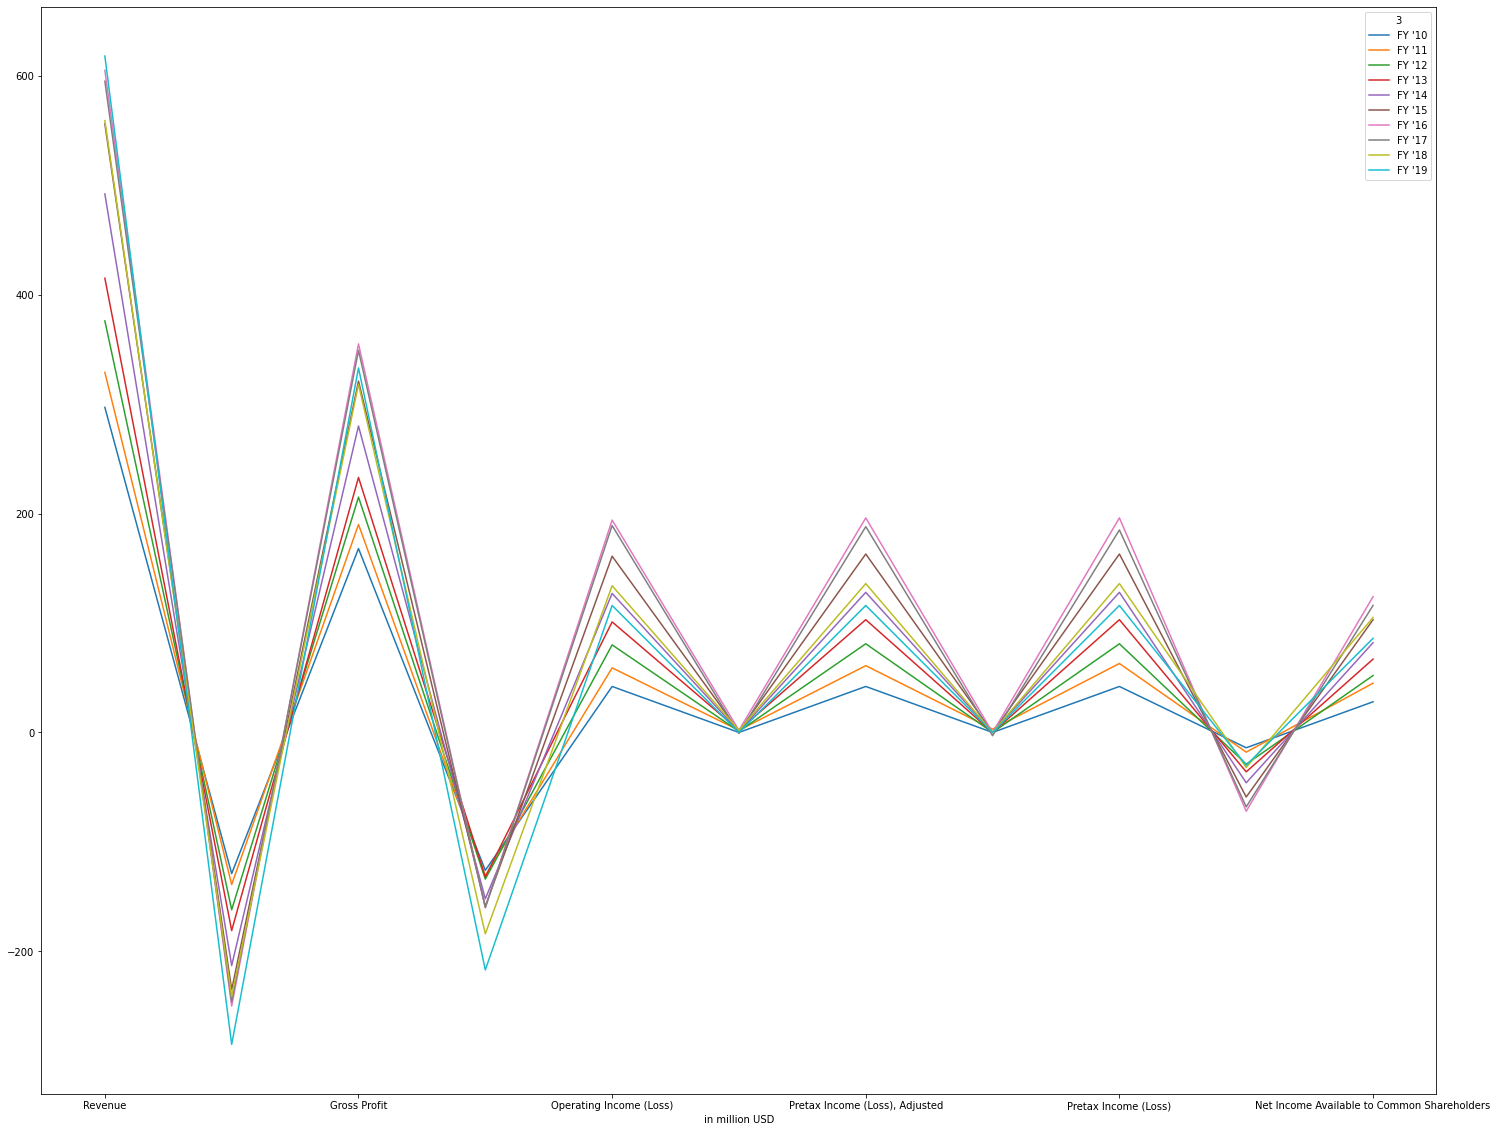

In [0]:
%matplotlib inline
df_PL.plot(figsize=(25,20))

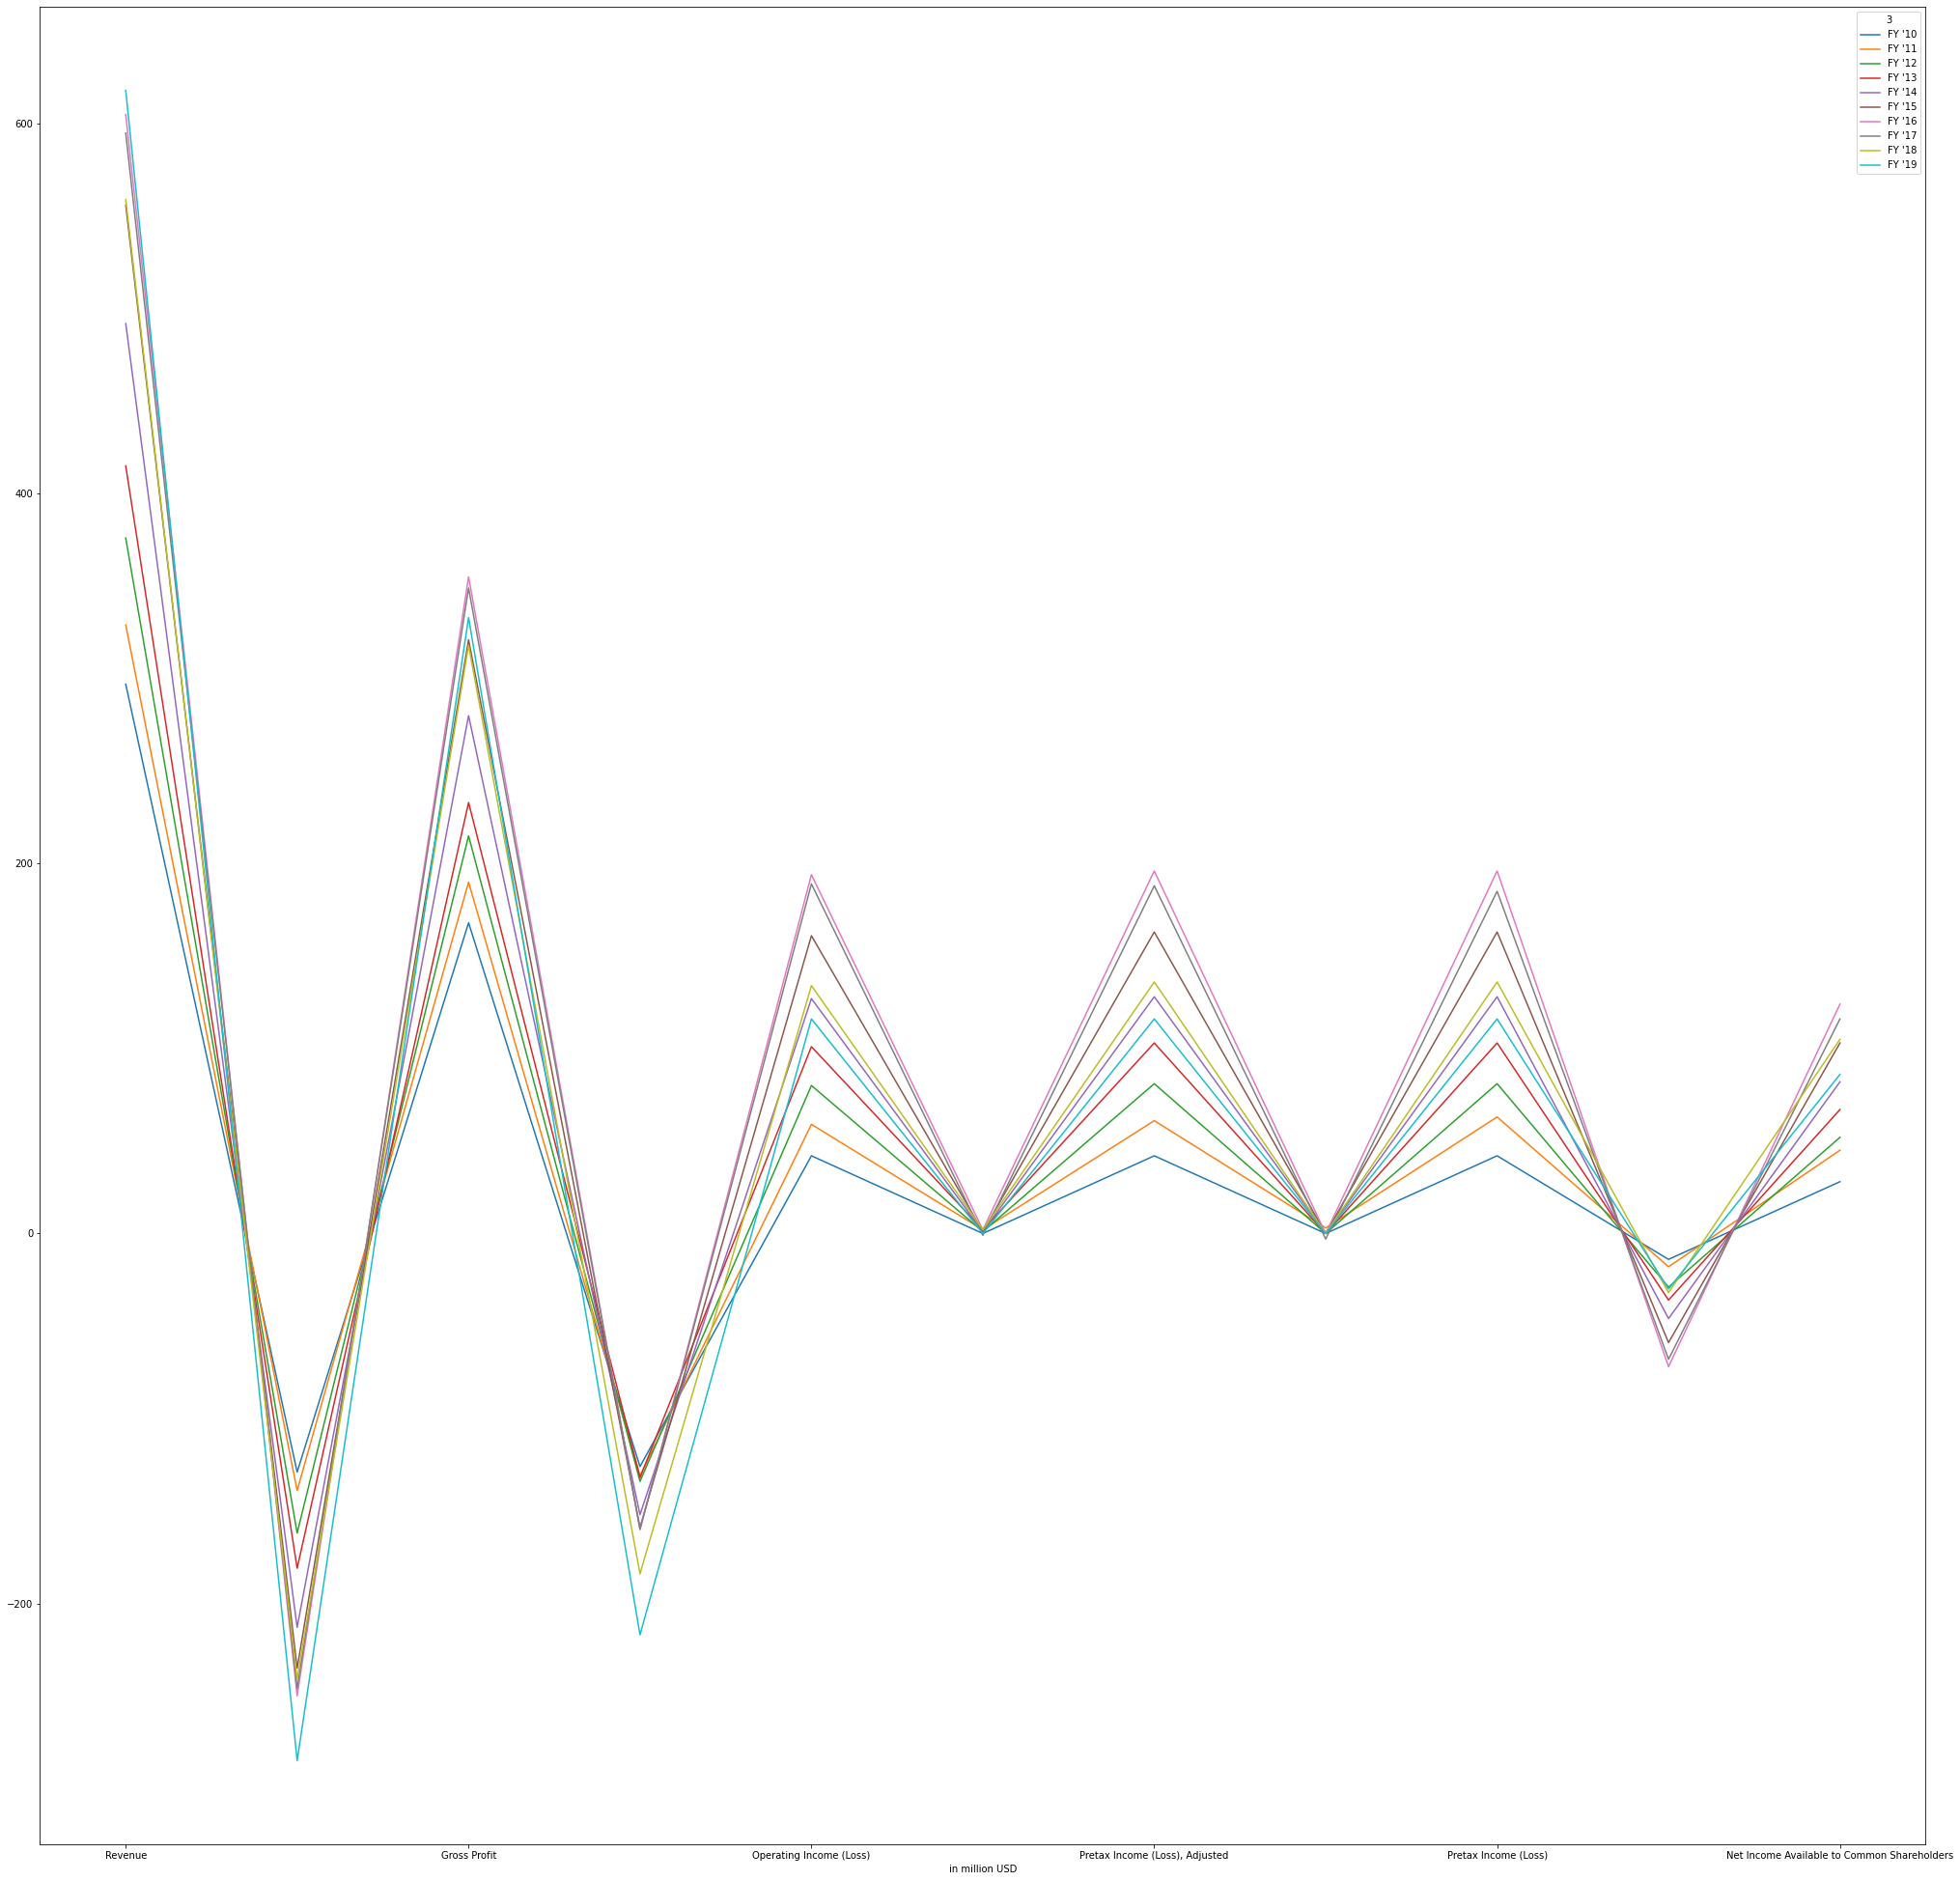

In [0]:
df_PL.plot(figsize=(35,35))

In [0]:
df_PL = df_PL.T
df_BS = df_BS.T
df_CF = df_CF.T

In [0]:
df_BS

in million USD,Assets,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Other Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Liabilities,Payables & Accruals,Other Short Term Liabilities,Total Current Liabilities,Other Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Preferred Equity,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity
17,,,,,,,,,,,,,,,,,,,,,,,
FY '10,0.0,125.0,47.0,16.0,189.0,15.0,2.0,75.0,91.0,280.0,0.0,41.0,45.0,86.0,10.0,10.0,97.0,0.0,1.0,184.0,-1.0,184.0,184.0
FY '11,0.0,98.0,56.0,20.0,175.0,13.0,1.0,71.0,85.0,260.0,0.0,38.0,50.0,88.0,9.0,9.0,98.0,0.0,0.0,167.0,-5.0,162.0,162.0
FY '12,0.0,103.0,62.0,16.0,182.0,16.0,0.0,65.0,80.0,262.0,0.0,43.0,48.0,91.0,9.0,9.0,100.0,0.0,1.0,165.0,-5.0,162.0,162.0
FY '13,0.0,133.0,71.0,15.0,219.0,14.0,0.0,65.0,79.0,298.0,0.0,50.0,54.0,104.0,12.0,12.0,116.0,0.0,1.0,189.0,-8.0,182.0,182.0
FY '14,0.0,124.0,87.0,19.0,230.0,17.0,0.0,71.0,88.0,318.0,0.0,64.0,59.0,123.0,13.0,13.0,136.0,0.0,1.0,191.0,-10.0,182.0,182.0
FY '15,0.0,129.0,97.0,11.0,237.0,21.0,0.0,74.0,95.0,332.0,0.0,58.0,69.0,127.0,10.0,10.0,137.0,0.0,1.0,207.0,-12.0,195.0,195.0
FY '16,0.0,96.0,100.0,11.0,207.0,17.0,0.0,73.0,90.0,297.0,0.0,54.0,63.0,118.0,10.0,10.0,128.0,0.0,1.0,185.0,-16.0,169.0,169.0
FY '17,0.0,126.0,92.0,10.0,228.0,15.0,0.0,71.0,87.0,315.0,0.0,49.0,75.0,124.0,16.0,16.0,140.0,0.0,1.0,186.0,-12.0,175.0,175.0
FY '18,0.0,101.0,100.0,15.0,215.0,14.0,0.0,77.0,92.0,307.0,0.0,63.0,82.0,145.0,15.0,15.0,160.0,0.0,1.0,163.0,-17.0,147.0,147.0


In [0]:
del(df_BS["Assets"])
del(df_BS["Liabilities"])
df_BS

in million USD,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Other Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Other Short Term Liabilities,Total Current Liabilities,Other Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Preferred Equity,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity
17,,,,,,,,,,,,,,,,,,,,,
FY '10,125.0,47.0,16.0,189.0,15.0,2.0,75.0,91.0,280.0,41.0,45.0,86.0,10.0,10.0,97.0,0.0,1.0,184.0,-1.0,184.0,184.0
FY '11,98.0,56.0,20.0,175.0,13.0,1.0,71.0,85.0,260.0,38.0,50.0,88.0,9.0,9.0,98.0,0.0,0.0,167.0,-5.0,162.0,162.0
FY '12,103.0,62.0,16.0,182.0,16.0,0.0,65.0,80.0,262.0,43.0,48.0,91.0,9.0,9.0,100.0,0.0,1.0,165.0,-5.0,162.0,162.0
FY '13,133.0,71.0,15.0,219.0,14.0,0.0,65.0,79.0,298.0,50.0,54.0,104.0,12.0,12.0,116.0,0.0,1.0,189.0,-8.0,182.0,182.0
FY '14,124.0,87.0,19.0,230.0,17.0,0.0,71.0,88.0,318.0,64.0,59.0,123.0,13.0,13.0,136.0,0.0,1.0,191.0,-10.0,182.0,182.0
FY '15,129.0,97.0,11.0,237.0,21.0,0.0,74.0,95.0,332.0,58.0,69.0,127.0,10.0,10.0,137.0,0.0,1.0,207.0,-12.0,195.0,195.0
FY '16,96.0,100.0,11.0,207.0,17.0,0.0,73.0,90.0,297.0,54.0,63.0,118.0,10.0,10.0,128.0,0.0,1.0,185.0,-16.0,169.0,169.0
FY '17,126.0,92.0,10.0,228.0,15.0,0.0,71.0,87.0,315.0,49.0,75.0,124.0,16.0,16.0,140.0,0.0,1.0,186.0,-12.0,175.0,175.0
FY '18,101.0,100.0,15.0,215.0,14.0,0.0,77.0,92.0,307.0,63.0,82.0,145.0,15.0,15.0,160.0,0.0,1.0,163.0,-17.0,147.0,147.0


In [0]:
operational_col_BS = []
financial_col_BS = []
financial_list = ['Cash', 'Debt', 'Marketable', 'Securities', 'Fixed Income Investments', 'Long Term Investments & Receivables']

for col in df_BS.columns: 
  if any(xs in col for xs in financial_list):
    financial_col_BS.append(col)
  else:
    operational_col_BS.append(col)

print(operational_col_BS)
print(financial_col_BS)


['Accounts & Notes Receivable', 'Other Short Term Assets', 'Total Current Assets', 'Property, Plant & Equipment, Net', 'Other Long Term Assets', 'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals', 'Other Short Term Liabilities', 'Total Current Liabilities', 'Other Long Term Liabilities', 'Total Noncurrent Liabilities', 'Total Liabilities', 'Preferred Equity', 'Share Capital & Additional Paid-In Capital', 'Retained Earnings', 'Other Equity', 'Equity Before Minority Interest', 'Total Equity']
['Cash, Cash Equivalents & Short Term Investments', 'Long Term Investments & Receivables']


In [0]:
operational_df_BS = df_BS[operational_col_BS]
financial_df_BS = df_BS[financial_col_BS]

In [0]:
operational_df_BS

in million USD,Accounts & Notes Receivable,Other Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Other Short Term Liabilities,Total Current Liabilities,Other Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Preferred Equity,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity
17,,,,,,,,,,,,,,,,,,,
FY '10,47.0,16.0,189.0,15.0,75.0,91.0,280.0,41.0,45.0,86.0,10.0,10.0,97.0,0.0,1.0,184.0,-1.0,184.0,184.0
FY '11,56.0,20.0,175.0,13.0,71.0,85.0,260.0,38.0,50.0,88.0,9.0,9.0,98.0,0.0,0.0,167.0,-5.0,162.0,162.0
FY '12,62.0,16.0,182.0,16.0,65.0,80.0,262.0,43.0,48.0,91.0,9.0,9.0,100.0,0.0,1.0,165.0,-5.0,162.0,162.0
FY '13,71.0,15.0,219.0,14.0,65.0,79.0,298.0,50.0,54.0,104.0,12.0,12.0,116.0,0.0,1.0,189.0,-8.0,182.0,182.0
FY '14,87.0,19.0,230.0,17.0,71.0,88.0,318.0,64.0,59.0,123.0,13.0,13.0,136.0,0.0,1.0,191.0,-10.0,182.0,182.0
FY '15,97.0,11.0,237.0,21.0,74.0,95.0,332.0,58.0,69.0,127.0,10.0,10.0,137.0,0.0,1.0,207.0,-12.0,195.0,195.0
FY '16,100.0,11.0,207.0,17.0,73.0,90.0,297.0,54.0,63.0,118.0,10.0,10.0,128.0,0.0,1.0,185.0,-16.0,169.0,169.0
FY '17,92.0,10.0,228.0,15.0,71.0,87.0,315.0,49.0,75.0,124.0,16.0,16.0,140.0,0.0,1.0,186.0,-12.0,175.0,175.0
FY '18,100.0,15.0,215.0,14.0,77.0,92.0,307.0,63.0,82.0,145.0,15.0,15.0,160.0,0.0,1.0,163.0,-17.0,147.0,147.0


In [0]:
operational_df_BS['Total Operating Assets'] = operational_df_BS.loc[:, : 'Total Assets'].sum(axis=1)
print (operational_df_BS)
operational_df_BS['Total Operating Liability'] = (operational_df_BS.loc[:, 'Total Assets':'Total Liabilities'].sum(axis=1)) - operational_df_BS['Total Assets']
print (operational_df_BS)
operational_df_BS['Net Operating Assets'] = operational_df_BS['Total Operating Assets'] - operational_df_BS['Total Operating Liability']
print (operational_df_BS)
operational_df_BS

in million USD  Accounts & Notes Receivable  ...  Total Operating Assets
17                                           ...                        
FY '10                                 47.0  ...                   713.0
FY '11                                 56.0  ...                   680.0
FY '12                                 62.0  ...                   683.0
FY '13                                 71.0  ...                   761.0
FY '14                                 87.0  ...                   830.0
FY '15                                 97.0  ...                   867.0
FY '16                                100.0  ...                   795.0
FY '17                                 92.0  ...                   818.0
FY '18                                100.0  ...                   820.0
FY '19                                101.0  ...                  1006.0

[10 rows x 20 columns]
in million USD  Accounts & Notes Receivable  ...  Total Operating Liability
17                      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


in million USD,Accounts & Notes Receivable,Other Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Other Short Term Liabilities,Total Current Liabilities,Other Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Preferred Equity,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Operating Assets,Total Operating Liability,Net Operating Assets
17,,,,,,,,,,,,,,,,,,,,,,
FY '10,47.0,16.0,189.0,15.0,75.0,91.0,280.0,41.0,45.0,86.0,10.0,10.0,97.0,0.0,1.0,184.0,-1.0,184.0,184.0,713.0,289.0,424.0
FY '11,56.0,20.0,175.0,13.0,71.0,85.0,260.0,38.0,50.0,88.0,9.0,9.0,98.0,0.0,0.0,167.0,-5.0,162.0,162.0,680.0,292.0,388.0
FY '12,62.0,16.0,182.0,16.0,65.0,80.0,262.0,43.0,48.0,91.0,9.0,9.0,100.0,0.0,1.0,165.0,-5.0,162.0,162.0,683.0,300.0,383.0
FY '13,71.0,15.0,219.0,14.0,65.0,79.0,298.0,50.0,54.0,104.0,12.0,12.0,116.0,0.0,1.0,189.0,-8.0,182.0,182.0,761.0,348.0,413.0
FY '14,87.0,19.0,230.0,17.0,71.0,88.0,318.0,64.0,59.0,123.0,13.0,13.0,136.0,0.0,1.0,191.0,-10.0,182.0,182.0,830.0,408.0,422.0
FY '15,97.0,11.0,237.0,21.0,74.0,95.0,332.0,58.0,69.0,127.0,10.0,10.0,137.0,0.0,1.0,207.0,-12.0,195.0,195.0,867.0,411.0,456.0
FY '16,100.0,11.0,207.0,17.0,73.0,90.0,297.0,54.0,63.0,118.0,10.0,10.0,128.0,0.0,1.0,185.0,-16.0,169.0,169.0,795.0,383.0,412.0
FY '17,92.0,10.0,228.0,15.0,71.0,87.0,315.0,49.0,75.0,124.0,16.0,16.0,140.0,0.0,1.0,186.0,-12.0,175.0,175.0,818.0,420.0,398.0
FY '18,100.0,15.0,215.0,14.0,77.0,92.0,307.0,63.0,82.0,145.0,15.0,15.0,160.0,0.0,1.0,163.0,-17.0,147.0,147.0,820.0,480.0,340.0


In [0]:
financial_df_BS
financial_df_BS['Financial Assets'] = financial_df_BS.iloc[:, 0:2].sum(axis=1)
financial_df_BS
financial_df_BS['Financial Debts'] = financial_df_BS.iloc[:, 2:4].sum(axis=1)
financial_df_BS
financial_df_BS['Net Debt'] = financial_df_BS['Financial Assets'] - financial_df_BS['Financial Debts']
print (financial_df_BS)
financial_df_BS

in million USD  Cash, Cash Equivalents & Short Term Investments  ...  Net Debt
17                                                               ...          
FY '10                                                    125.0  ...       0.0
FY '11                                                     98.0  ...       0.0
FY '12                                                    103.0  ...       0.0
FY '13                                                    133.0  ...       0.0
FY '14                                                    124.0  ...       0.0
FY '15                                                    129.0  ...       0.0
FY '16                                                     96.0  ...       0.0
FY '17                                                    126.0  ...       0.0
FY '18                                                    101.0  ...       0.0
FY '19                                                    111.0  ...       0.0

[10 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

in million USD,"Cash, Cash Equivalents & Short Term Investments",Long Term Investments & Receivables,Financial Assets,Financial Debts,Net Debt
17,,,,,
FY '10,125.0,2.0,127.0,127.0,0.0
FY '11,98.0,1.0,99.0,99.0,0.0
FY '12,103.0,0.0,103.0,103.0,0.0
FY '13,133.0,0.0,133.0,133.0,0.0
FY '14,124.0,0.0,124.0,124.0,0.0
FY '15,129.0,0.0,129.0,129.0,0.0
FY '16,96.0,0.0,96.0,96.0,0.0
FY '17,126.0,0.0,126.0,126.0,0.0
FY '18,101.0,0.0,101.0,101.0,0.0


In [0]:
df_PL

in million USD,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),Non-Operating Income (Loss),"Pretax Income (Loss), Adjusted",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders
3,,,,,,,,,,,
FY '10,297.0,-129.0,168.0,-126.0,42.0,0.0,42.0,0.0,42.0,-14.0,28.0
FY '11,329.0,-139.0,190.0,-131.0,59.0,2.0,61.0,3.0,63.0,-18.0,45.0
FY '12,376.0,-162.0,215.0,-134.0,80.0,1.0,81.0,0.0,81.0,-29.0,52.0
FY '13,415.0,-181.0,233.0,-132.0,101.0,2.0,103.0,0.0,103.0,-36.0,67.0
FY '14,492.0,-213.0,280.0,-152.0,127.0,1.0,128.0,0.0,128.0,-46.0,82.0
FY '15,556.0,-235.0,321.0,-159.0,161.0,1.0,163.0,0.0,163.0,-59.0,103.0
FY '16,605.0,-250.0,355.0,-160.0,194.0,2.0,196.0,0.0,196.0,-72.0,124.0
FY '17,595.0,-246.0,349.0,-160.0,189.0,-1.0,188.0,-3.0,185.0,-68.0,116.0
FY '18,559.0,-241.0,318.0,-184.0,134.0,2.0,136.0,0.0,136.0,-32.0,105.0


In [0]:
operational_col_PL = []
financial_col_PL = []
financial_list = ['Cash', 'Debt', 'Marketable', 'Securities', 'Fixed Income Investments', 'Non-Operating', 'Abnormal Gains (Losses)', 'Net Extraordinary Gains (Losses)']

for col in df_PL.columns: 
  if any(xs in col for xs in financial_list):
    financial_col_PL.append(col)
  else:
    operational_col_PL.append(col)

print(operational_col_PL)
print(financial_col_PL)

['Revenue', 'Cost of revenue', 'Gross Profit', 'Operating Expenses', 'Operating Income (Loss)', 'Pretax Income (Loss), Adjusted', 'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, net', 'Net Income Available to Common Shareholders']
['Non-Operating Income (Loss)', 'Abnormal Gains (Losses)']


In [0]:
operational_df_PL = df_PL[operational_col_PL]
financial_df_PL = df_PL[financial_col_PL]

In [0]:
operational_df_PL

in million USD,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),"Pretax Income (Loss), Adjusted",Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders
3,,,,,,,,,
FY '10,297.0,-129.0,168.0,-126.0,42.0,42.0,42.0,-14.0,28.0
FY '11,329.0,-139.0,190.0,-131.0,59.0,61.0,63.0,-18.0,45.0
FY '12,376.0,-162.0,215.0,-134.0,80.0,81.0,81.0,-29.0,52.0
FY '13,415.0,-181.0,233.0,-132.0,101.0,103.0,103.0,-36.0,67.0
FY '14,492.0,-213.0,280.0,-152.0,127.0,128.0,128.0,-46.0,82.0
FY '15,556.0,-235.0,321.0,-159.0,161.0,163.0,163.0,-59.0,103.0
FY '16,605.0,-250.0,355.0,-160.0,194.0,196.0,196.0,-72.0,124.0
FY '17,595.0,-246.0,349.0,-160.0,189.0,188.0,185.0,-68.0,116.0
FY '18,559.0,-241.0,318.0,-184.0,134.0,136.0,136.0,-32.0,105.0


In [0]:
operational_df_PL['Net Operating Income'] = operational_df_PL['Revenue'] + operational_df_PL['Cost of revenue'] + operational_df_PL['Operating Expenses'] + operational_df_PL['Income Tax (Expense) Benefit, net']
# print (operational_df_BS)
# operational_df_BS['Total Operating Liability'] = operational_df_BS.iloc[:, 7:12].sum(axis=1)
# print (operational_df_BS)
# operational_df_BS['Net Operating Assets'] = operational_df_BS['Total Operating Assets'] - operational_df_BS['Total Operating Liability']
# print (operational_df_BS)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
operational_df_PL['Net Operating Assets'] = operational_df_BS['Net Operating Assets']

Residual Operating Income without Leverage

In [0]:
operational_df_PL['Residual Operating Income'] = operational_df_PL['Net Operating Income'] - (operational_df_BS['Net Operating Assets'] * rfr_equity)

In [0]:
operational_df_PL['Expected Residual Operating Income Next Year'] = operational_df_PL['Residual Operating Income'] + (operational_df_PL['Residual Operating Income'] * growth_next_year)

In [0]:
operational_df_PL

in million USD,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),"Pretax Income (Loss), Adjusted",Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders,Net Operating Income,Net Operating Assets,Residual Operating Income,Expected Residual Operating Income Next Year
3,,,,,,,,,,,,,
FY '10,297.0,-129.0,168.0,-126.0,42.0,42.0,42.0,-14.0,28.0,28.0,424.0,2.56,2.56
FY '11,329.0,-139.0,190.0,-131.0,59.0,61.0,63.0,-18.0,45.0,41.0,388.0,17.72,17.72
FY '12,376.0,-162.0,215.0,-134.0,80.0,81.0,81.0,-29.0,52.0,51.0,383.0,28.02,28.02
FY '13,415.0,-181.0,233.0,-132.0,101.0,103.0,103.0,-36.0,67.0,66.0,413.0,41.22,41.22
FY '14,492.0,-213.0,280.0,-152.0,127.0,128.0,128.0,-46.0,82.0,81.0,422.0,55.68,55.68
FY '15,556.0,-235.0,321.0,-159.0,161.0,163.0,163.0,-59.0,103.0,103.0,456.0,75.64,75.64
FY '16,605.0,-250.0,355.0,-160.0,194.0,196.0,196.0,-72.0,124.0,123.0,412.0,98.28,98.28
FY '17,595.0,-246.0,349.0,-160.0,189.0,188.0,185.0,-68.0,116.0,121.0,398.0,97.12,97.12
FY '18,559.0,-241.0,318.0,-184.0,134.0,136.0,136.0,-32.0,105.0,102.0,340.0,81.60,81.60


In [0]:
operational_df_PL['Discounted Present Value'] = operational_df_PL['Expected Residual Operating Income Next Year'] / (((1+rfr_equity)**2) * rfr_equity)

In [0]:
operational_df_PL['Value of Operations'] = operational_df_BS['Net Operating Assets'] + operational_df_PL['Residual Operating Income'] + operational_df_PL['Expected Residual Operating Income Next Year'] + operational_df_PL['Discounted Present Value']

In [0]:
operational_df_PL['Equity Value'] = operational_df_PL['Value of Operations'] + financial_df_BS['Net Debt']

In [0]:
df_metrics = pd.DataFrame.from_records(rows3, coerce_float=True)
df_metrics.dropna(how='all', inplace=True)
df_metrics.head()

,0,1,2,3,4,5,6,7,8,9,10
0,,12/31/2010,12/31/2011,12/31/2012,12/31/2013,12/31/2014,12/31/2015,12/31/2016,12/31/2017,12/31/2018,12/31/2019
1,P/E ratio,23.313,18.2715,22.8561,33.4701,37.3578,47.2643,31.5896,29.9167,26.6478,60.4167
2,P/S ratio,2.2096,2.5086,3.1529,5.4319,6.2056,8.7347,6.4791,5.8472,5.0164,8.3108
3,P/FCF ratio,14.8867,16.2753,17.6012,26.6001,36.0343,44.7237,29.5615,22.0232,21.5693,38.9907
4,P/Operating CF,44.9332,55.6998,49.7102,97.8923,75.5049,134.5476,103.4925,73.3071,82.423,148.5927


In [0]:
df_metrics = df_metrics.T
df_metrics

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,ROIC,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of...",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin
1,12/31/2010,23.313,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0,0,1.09,1.7808,-0.6409,0.6176,0,0.1529,0.1029,0.4469,0.1137,0.239,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944
2,12/31/2011,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0,0,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,0.6009,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.248,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.062,0.6203,0,1.2009,1.9809,0,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364
3,12/31/2012,22.8561,3.1529,17.6012,49.7102,7.345,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.812,1.9915,-1.2023,0,0,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,0.856,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.857,0,1.3104,2.0538,0,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378
4,12/31/2013,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0,0,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,1.3018,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.166,-0.0618,1.1041,0,1.7343,2.3686,0,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623
5,12/31/2014,37.3578,6.2056,36.0343,75.5049,16.777,25.4965,5.9527,21.9426,31.1098,34.5659,2929358400,3053796400,1.7202,1.8716,-0.9321,0,0,1.5977,1.1483,-1.4764,0.3694,0,0.451,0.2662,1.3797,0.2509,0.6596,6.2306,17.6868,0,64.4015,21.4335,0,0.0995,0.1973,0.1957,0.0197,0.0307,7.7153,0,0,0.0268,0.0278,6.5618,1.2556,-0.1255,1.13,0,1.6593,2.4271,0,2.4563,84747000,107046000,-9415000,93714000,78982000,12019000,307999000,181804500,23.0433,0.0191,0.1666
6,12/31/2015,47.2643,8.7347,44.7237,134.5476,24.8589,36.4683,8.5033,27.9591,39.3745,43.5387,4730963310,4859723310,1.778,1.8627,-0.7609,0,0,1.7108,1.1612,-1.4802,0.3666,0,0.5482,0.3182,1.5121,0.3052,0.7905,6.0407,19.8657,0,63.8842,17.3936,0,0.0968,0.1759,0.1873,0.0261,0.0206,9.1568,0,0,0.0212,0.0224,7.5755,1.636,-0.1565,1.4795,0,1.7532,2.6618,0,2.6866,108661000,109726000,-11492000,100160000,92103500,11851000,325206500,188

In [0]:
#Making First Row Header
new_header = df_metrics.iloc[0] #grab the first row for the header
df_metrics = df_metrics[1:] #take the data less the header row
df_metrics.columns = new_header #set the header row as the df header
df_metrics

,,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,ROIC,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of Revenue",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin
1,12/31/2010,23.313,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0,0,1.09,1.7808,-0.6409,0.6176,0,0.1529,0.1029,0.4469,0.1137,0.239,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944
2,12/31/2011,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0,0,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,0.6009,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.248,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.062,0.6203,0,1.2009,1.9809,0,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364
3,12/31/2012,22.8561,3.1529,17.6012,49.7102,7.345,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.812,1.9915,-1.2023,0,0,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,0.856,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.857,0,1.3104,2.0538,0,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378
4,12/31/2013,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0,0,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,1.3018,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.166,-0.0618,1.1041,0,1.7343,2.3686,0,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623
5,12/31/2014,37.3578,6.2056,36.0343,75.5049,16.777,25.4965,5.9527,21.9426,31.1098,34.5659,2929358400,3053796400,1.7202,1.8716,-0.9321,0,0,1.5977,1.1483,-1.4764,0.3694,0,0.451,0.2662,1.3797,0.2509,0.6596,6.2306,17.6868,0,64.4015,21.4335,0,0.0995,0.1973,0.1957,0.0197,0.0307,7.7153,0,0,0.0268,0.0278,6.5618,1.2556,-0.1255,1.13,0,1.6593,2.4271,0,2.4563,84747000,107046000,-9415000,93714000,78982000,12019000,307999000,181804500,23.0433,0.0191,0.1666
6,12/31/2015,47.2643,8.7347,44.7237,134.5476,24.8589,36.4683,8.5033,27.9591,39.3745,43.5387,4730963310,4859723310,1.778,1.8627,-0.7609,0,0,1.7108,1.1612,-1.4802,0.3666,0,0.5482,0.3182,1.5121,0.3052,0.7905,6.0407,19.8657,0,63.8842,17.3936,0,0.0968,0.1759,0.1873,0.0261,0.0206,9.1568,0,0,0.0212,0.0224,7.5755,1.636,-0.1565,1.4795,0,1.7532,2.6618,0,2.6866,108661000,109726000,-11492000,100160000,92103500,11851000,325206500,188757500,29.3037,0.0207,0.186
7,12/31/2016,31.5896,6.4791,29.5615,103.4925,23.1273,36.5602,6.3209,18.7877,27.4236,28.8399,3821369100,3916984100,1.6652,1.7597,-0.4701,0,0,1.9211,1.12

In [0]:
df_metrics = df_metrics.rename(columns = {"" : "Date"})
df_metrics

,Date,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,ROIC,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of Revenue",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin
1,12/31/2010,23.313,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0,0,1.09,1.7808,-0.6409,0.6176,0,0.1529,0.1029,0.4469,0.1137,0.239,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944
2,12/31/2011,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0,0,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,0.6009,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.248,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.062,0.6203,0,1.2009,1.9809,0,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364
3,12/31/2012,22.8561,3.1529,17.6012,49.7102,7.345,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.812,1.9915,-1.2023,0,0,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,0.856,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.857,0,1.3104,2.0538,0,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378
4,12/31/2013,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0,0,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,1.3018,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.166,-0.0618,1.1041,0,1.7343,2.3686,0,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623
5,12/31/2014,37.3578,6.2056,36.0343,75.5049,16.777,25.4965,5.9527,21.9426,31.1098,34.5659,2929358400,3053796400,1.7202,1.8716,-0.9321,0,0,1.5977,1.1483,-1.4764,0.3694,0,0.451,0.2662,1.3797,0.2509,0.6596,6.2306,17.6868,0,64.4015,21.4335,0,0.0995,0.1973,0.1957,0.0197,0.0307,7.7153,0,0,0.0268,0.0278,6.5618,1.2556,-0.1255,1.13,0,1.6593,2.4271,0,2.4563,84747000,107046000,-9415000,93714000,78982000,12019000,307999000,181804500,23.0433,0.0191,0.1666
6,12/31/2015,47.2643,8.7347,44.7237,134.5476,24.8589,36.4683,8.5033,27.9591,39.3745,43.5387,4730963310,4859723310,1.778,1.8627,-0.7609,0,0,1.7108,1.1612,-1.4802,0.3666,0,0.5482,0.3182,1.5121,0.3052,0.7905,6.0407,19.8657,0,63.8842,17.3936,0,0.0968,0.1759,0.1873,0.0261,0.0206,9.1568,0,0,0.0212,0.0224,7.5755,1.636,-0.1565,1.4795,0,1.7532,2.6618,0,2.6866,108661000,109726000,-11492000,100160000,92103500,11851000,325206500,188757500,29.3037,0.0207,0.186
7,12/31/2016,31.5896,6.4791,29.5615,103.4925,23.1273,36.5602,6.3209,18.7877,27.4236,28.8399,3821369100,3916984100,1.6652,1.7597,-0.4701,0,0,1.9211,

In [0]:
df_metrics.set_index('Date', inplace=True)
df_metrics

,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,ROIC,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of Revenue",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12/31/2010,23.313,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0,0,1.09,1.7808,-0.6409,0.6176,0,0.1529,0.1029,0.4469,0.1137,0.239,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944
12/31/2011,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0,0,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,0.6009,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.248,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.062,0.6203,0,1.2009,1.9809,0,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364
12/31/2012,22.8561,3.1529,17.6012,49.7102,7.345,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.812,1.9915,-1.2023,0,0,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,0.856,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.857,0,1.3104,2.0538,0,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378
12/31/2013,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0,0,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,1.3018,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.166,-0.0618,1.1041,0,1.7343,2.3686,0,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623
12/31/2014,37.3578,6.2056,36.0343,75.5049,16.777,25.4965,5.9527,21.9426,31.1098,34.5659,2929358400,3053796400,1.7202,1.8716,-0.9321,0,0,1.5977,1.1483,-1.4764,0.3694,0,0.451,0.2662,1.3797,0.2509,0.6596,6.2306,17.6868,0,64.4015,21.4335,0,0.0995,0.1973,0.1957,0.0197,0.0307,7.7153,0,0,0.0268,0.0278,6.5618,1.2556,-0.1255,1.13,0,1.6593,2.4271,0,2.4563,84747000,107046000,-9415000,93714000,78982000,12019000,307999000,181804500,23.0433,0.0191,0.1666
12/31/2015,47.2643,8.7347,44.7237,134.5476,24.8589,36.4683,8.5033,27.9591,39.3745,43.5387,4730963310,4859723310,1.778,1.8627,-0.7609,0,0,1.7108,1.1612,-1.4802,0.3666,0,0.5482,0.3182,1.5121,0.3052,0.7905,6.0407,19.8657,0,63.8842,17.3936,0,0.0968,0.1759,0.1873,0.0261,0.0206,9.1568,0,0,0.0212,0.0224,7.5755,1.636,-0.1565,1.4795,0,1.7532,2.6618,0,2.6866,108661000,109726000,-11492000,100160000,92103500,11851000,325206500,188757500,29.3037,0.0207,0.186
12/31/2016,31.5896,6.4791,29.5615,103.4925,23.1273,36.5602,6.3209,18.7877,27.4236,28.8399,382136

In [0]:
df_metrics = df_metrics.apply(pd.to_numeric, errors='coerce')
df_metrics

,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,ROIC,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of Revenue",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12/31/2010,23.3130,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0.0000,0.0000,1.0900,1.7808,-0.6409,0.6176,0,0.1529,0.1029,0.4469,0.1137,0.2390,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0.0000,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944
12/31/2011,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0.0000,0.0000,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,0.6009,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.2480,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.0620,0.6203,0,1.2009,1.9809,0.0000,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364
12/31/2012,22.8561,3.1529,17.6012,49.7102,7.3450,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.8120,1.9915,-1.2023,0.0000,0.0000,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,0.8560,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.8570,0,1.3104,2.0538,0.0000,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378
12/31/2013,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0.0000,0.0000,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,1.3018,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.1660,-0.0618,1.1041,0,1.7343,2.3686,0.0000,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623
12/31/2014,37.3578,6.2056,36.0343,75.5049,16.7770,25.4965,5.9527,21.9426,31.1098,34.5659,2929358400,3053796400,1.7202,1.8716,-0.9321,0.0000,0.0000,1.5977,1.1483,-1.4764,0.3694,0,0.4510,0.2662,1.3797,0.2509,0.6596,6.2306,17.6868,0,64.4015,21.4335,0,0.0995,0.1973,0.1957,0.0197,0.0307,7.7153,0,0,0.0268,0.0278,6.5618,1.2556,-0.1255,1.1300,0,1.6593,2.4271,0.0000,2.4563,84747000,107046000,-9415000,93714000,78982000,12019000,307999000,181804500,23.0433,0.0191,0.1666
12/31/2015,47.2643,8.7347,44.7237,134.5476,24.8589,36.4683,8.5033,27.9591,39.3745,43.5387,4730963310,4859723310,1.7780,1.8627,-0.7609,0.0000,0.0000,1.7108,1.1612,-1.4802,0.3666,0,0.5482,0.3182,1.5121,0.3052,0.7905,6.0407,19.8657,0,63.8842,17.3936,0,0.0968,0.1759,0.1873,0.0261,0.0206,9.1568,0,0,0.0212,0.0224,7.5755,1.6360,-0.1565,1.4795,0,1.7532,2.6618,0.0000,2.6866,108661000,109726000,-11492000,100160000,92103500,11851000,325206500,188757500,29.3037,0.

In [0]:
operational_df_PL = operational_df_PL.join(df_metrics.set_index(operational_df_PL.index))
operational_df_PL

,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),"Pretax Income (Loss), Adjusted",Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders,Net Operating Income,Net Operating Assets,Residual Operating Income,Expected Residual Operating Income Next Year,Discounted Present Value,Value of Operations,Equity Value,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,ROIC,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of Revenue",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FY '10,297.0,-129.0,168.0,-126.0,42.0,42.0,42.0,-14.0,28.0,28.0,424.0,2.56,2.56,37.973181,467.093181,467.093181,23.3130,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0.0000,0.0000,1.0900,1.7808,-0.6409,0.6176,0,0.1529,0.1029,0.4469,0.1137,0.2390,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0.0000,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944
FY '11,329.0,-139.0,190.0,-131.0,59.0,61.0,63.0,-18.0,45.0,41.0,388.0,17.72,17.72,262.845615,686.285615,686.285615,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0.0000,0.0000,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,0.6009,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.2480,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.0620,0.6203,0,1.2009,1.9809,0.0000,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364
FY '12,376.0,-162.0,215.0,-134.0,80.0,81.0,81.0,-29.0,52.0,51.0,383.0,28.02,28.02,415.628337,854.668337,854.668337,22.8561,3.1529,17.6012,49.7102,7.3450,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.8120,1.9915,-1.2023,0.0000,0.0000,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,0.8560,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.8570,0,1.3104,2.0538,0.0000,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378
FY '13,415.0,-181.0,233.0,-132.0,101.0,103.0,103.0,-36.0,67.0,66.0,413.0,41.22,41.22,611.427554,1106.867554,1106.867554,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0.0000,0.0000,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,1.3018,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.1660,-0.0618,1.1041,0,1.7343,2.3686,0.0000,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623
FY '14,492.0,-213.0,280.0,-152.0,127.0,128.0,128.0,-46.0,82.0,81.0,422.0,55.68,55.68,825.916696,1359.276

In [0]:
operational_df_PL

,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),"Pretax Income (Loss), Adjusted",Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders,Net Operating Income,Net Operating Assets,Residual Operating Income,Expected Residual Operating Income Next Year,Discounted Present Value,Value of Operations,Equity Value,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,ROIC,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of Revenue",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FY '10,297.0,-129.0,168.0,-126.0,42.0,42.0,42.0,-14.0,28.0,28.0,424.0,2.56,2.56,37.973181,467.093181,467.093181,23.3130,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0.0000,0.0000,1.0900,1.7808,-0.6409,0.6176,0,0.1529,0.1029,0.4469,0.1137,0.2390,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0.0000,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944
FY '11,329.0,-139.0,190.0,-131.0,59.0,61.0,63.0,-18.0,45.0,41.0,388.0,17.72,17.72,262.845615,686.285615,686.285615,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0.0000,0.0000,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,0.6009,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.2480,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.0620,0.6203,0,1.2009,1.9809,0.0000,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364
FY '12,376.0,-162.0,215.0,-134.0,80.0,81.0,81.0,-29.0,52.0,51.0,383.0,28.02,28.02,415.628337,854.668337,854.668337,22.8561,3.1529,17.6012,49.7102,7.3450,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.8120,1.9915,-1.2023,0.0000,0.0000,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,0.8560,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.8570,0,1.3104,2.0538,0.0000,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378
FY '13,415.0,-181.0,233.0,-132.0,101.0,103.0,103.0,-36.0,67.0,66.0,413.0,41.22,41.22,611.427554,1106.867554,1106.867554,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0.0000,0.0000,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,1.3018,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.1660,-0.0618,1.1041,0,1.7343,2.3686,0.0000,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623
FY '14,492.0,-213.0,280.0,-152.0,127.0,128.0,128.0,-46.0,82.0,81.0,422.0,55.68,55.68,825.916696,1359.276

In [0]:
df_price = pd.DataFrame.from_records(rows2, coerce_float=True)
df_price.dropna(how='all', inplace=True)
df_price.head()

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Adj Close,Volume
1,5/1/2010,7.17,7.7475,6.5925,7.2375,7.2375,17977600
2,6/1/2010,7.22,7.6225,6.585,6.8875,6.8875,11976000
3,7/1/2010,6.9175,7.4225,6.5825,6.715,6.715,12909600
4,8/1/2010,6.7875,6.8075,6.195,6.5125,6.5125,10932800


In [0]:
#Making First Row Header
new_header = df_price.iloc[0] #grab the first row for the header
df_price = df_price[1:] #take the data less the header row
df_price.columns = new_header #set the header row as the df header


In [0]:
df_price["Adj Close"]=df_price["Adj Close"].astype(float)

df_price['Date'] = pd.to_datetime(df_price.Date)


In [0]:
df_price_by_year = df_price.groupby(df_price.Date.dt.year)['Adj Close'].agg(['mean'])
if 2020 in df_price_by_year.index: 
   df_price_by_year = df_price_by_year.drop([2020])
df_price_by_year = df_price_by_year.rename(columns={'mean': 'Avg Yearly Market Price'})
df_price_by_year

,Avg Yearly Market Price
Date,
2010,7.224062
2011,9.063125
2012,12.775625
2013,21.887500
2014,34.759167
2015,59.448333
2016,57.720000
2017,46.551667
2018,47.561666


In [0]:
operational_df_PL = operational_df_PL.join(df_price_by_year.set_index(operational_df_PL.index))

In [0]:
operational_df_PL

,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),"Pretax Income (Loss), Adjusted",Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders,Net Operating Income,Net Operating Assets,Residual Operating Income,Expected Residual Operating Income Next Year,Discounted Present Value,Value of Operations,Equity Value,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,ROIC,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of Revenue",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin,Avg Yearly Market Price
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FY '10,297.0,-129.0,168.0,-126.0,42.0,42.0,42.0,-14.0,28.0,28.0,424.0,2.56,2.56,37.973181,467.093181,467.093181,23.3130,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0.0000,0.0000,1.0900,1.7808,-0.6409,0.6176,0,0.1529,0.1029,0.4469,0.1137,0.2390,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0.0000,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944,7.224062
FY '11,329.0,-139.0,190.0,-131.0,59.0,61.0,63.0,-18.0,45.0,41.0,388.0,17.72,17.72,262.845615,686.285615,686.285615,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0.0000,0.0000,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,0.6009,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.2480,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.0620,0.6203,0,1.2009,1.9809,0.0000,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364,9.063125
FY '12,376.0,-162.0,215.0,-134.0,80.0,81.0,81.0,-29.0,52.0,51.0,383.0,28.02,28.02,415.628337,854.668337,854.668337,22.8561,3.1529,17.6012,49.7102,7.3450,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.8120,1.9915,-1.2023,0.0000,0.0000,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,0.8560,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.8570,0,1.3104,2.0538,0.0000,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378,12.775625
FY '13,415.0,-181.0,233.0,-132.0,101.0,103.0,103.0,-36.0,67.0,66.0,413.0,41.22,41.22,611.427554,1106.867554,1106.867554,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0.0000,0.0000,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,1.3018,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.1660,-0.0618,1.1041,0,1.7343,2.3686,0.0000,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623,21.887500
FY '14,492.0,-213.0,280.0,-152.0,127.0,12

In [0]:
operational_df_PL['Equity Value Per Share'] = operational_df_PL['Equity Value'] / (operational_df_PL['Market Cap']/(operational_df_PL['Avg Yearly Market Price'] * 1000000))
operational_df_PL

,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),"Pretax Income (Loss), Adjusted",Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders,Net Operating Income,Net Operating Assets,Residual Operating Income,Expected Residual Operating Income Next Year,Discounted Present Value,Value of Operations,Equity Value,P/E ratio,P/S ratio,P/FCF ratio,P/Operating CF,P/B ratio,Price to Tangible BV,EV/Sales,EV/EBITDA,EV/Operating CF,EV/FCF,Enterprise Value,Market Cap,Quick Ratio,Current Ratio,Net Debt/EBITDA,Debt/Assets,Debt/Equity,Asset Turnover,Operating CF/Net income,Capex/Depreciation,Depreciation/Fixed assets,Interest Coverage,ROE,ROA,...,Cash ROIC,Return on Tangible Assets,Accounts Receivable Turnover,Accounts Payable Turnover,Inventory Turnover,Average Days of Receivables,Average Days of Payables,Days of Inventory on Hand,Research and Development Expense of Revenue,"Selling, General and Administrative Expense of Revenue",Intangible Assets out of Total Assets,Share Based Compensation of Revenue,Graham Net-Net,Graham Number,Payout ratio,Dividend Yield,Earnings Yield,Free Cash Flow Yield,Revenue per Share,Operating CF per Share,Capex per Share,Free Cash Flow per Share,Dividend per Share,Cash per Share,Shareholders Equity per Share,Interest Debt per Share,Book value per Share,Free Cash Flow,Working Capital,Capital Expenditures,Net Current Asset Value,Average Receivables,Average Payables,Average Assets,Average Common Equity,EV/EBIT,Capex to Sales,Net Profit Margin,Avg Yearly Market Price,Equity Value Per Share
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FY '10,297.0,-129.0,168.0,-126.0,42.0,42.0,42.0,-14.0,28.0,28.0,424.0,2.56,2.56,37.973181,467.093181,467.093181,23.3130,2.2096,14.8867,44.9332,3.5719,5.4551,1.7884,10.4009,10.6332,12.0487,531360380,656518380,2.0262,2.1877,-2.4499,0.0000,0.0000,1.0900,1.7808,-0.6409,0.6176,0,0.1529,0.1029,...,0.1137,0.2390,6.7673,21.1498,0,61.2578,21.9495,0,0.1363,0.2582,0.2262,0.0351,0.1406,3.9687,0,0,0.0429,0.0672,3.4553,0.5812,-0.0683,0.5129,0,1.4555,2.1375,0.0000,2.1146,44101000,102598000,-5871000,92316000,43905000,6089500,272587500,183582500,12.6735,0.0198,0.0944,7.224062,5.139704
FY '11,329.0,-139.0,190.0,-131.0,59.0,61.0,63.0,-18.0,45.0,41.0,388.0,17.72,17.72,262.845615,686.285615,686.285615,18.2715,2.5086,16.2753,55.6998,5.0961,8.2747,2.2102,10.6008,13.0359,14.3392,727713900,825972900,1.8086,1.9803,-1.4314,0.0000,0.0000,1.2193,1.2431,-0.6966,0.5468,0,0.2597,0.1663,...,0.1633,0.4504,5.9331,17.5688,0,67.7591,21.2281,0,0.1287,0.2480,0.2398,0.0315,0.0932,4.9624,0,0,0.0547,0.0614,4.0241,0.6823,-0.0620,0.6203,0,1.2009,1.9809,0.0000,1.9847,50750000,86391000,-5074000,76994000,55494000,7917500,270032000,172940000,11.8592,0.0154,0.1364,9.063125,7.530383
FY '12,376.0,-162.0,215.0,-134.0,80.0,81.0,81.0,-29.0,52.0,51.0,383.0,28.02,28.02,415.628337,854.668337,854.668337,22.8561,3.1529,17.6012,49.7102,7.3450,11.9532,2.8791,12.6383,14.3912,16.0722,1083237400,1186284400,1.8120,1.9915,-1.2023,0.0000,0.0000,1.4432,1.4516,-1.3964,0.3603,0,0.3205,0.1989,...,0.2254,0.4891,6.1067,17.6578,0,60.2454,23.0843,0,0.1188,0.2235,0.2378,0.0222,0.0685,5.5226,0,0,0.0438,0.0568,4.7844,0.9572,-0.1001,0.8570,0,1.3104,2.0538,0.0000,2.0579,67398000,90366000,-7873000,81203000,61612500,9159500,260706500,161794500,13.5281,0.0209,0.1378,12.775625,9.204304
FY '13,415.0,-181.0,233.0,-132.0,101.0,103.0,103.0,-36.0,67.0,66.0,413.0,41.22,41.22,611.427554,1106.867554,1106.867554,33.4701,5.4319,26.6001,97.8923,12.3998,18.8714,5.1112,19.7799,23.7022,25.0294,2118665680,2251621680,1.9589,2.0995,-1.2413,0.0000,0.0000,1.4814,1.3283,-0.8137,0.4061,0,0.3923,0.2405,...,0.2386,0.5221,6.2222,16.6316,0,62.6381,23.2821,0,0.1075,0.1971,0.2091,0.0177,0.0455,6.8385,0,0,0.0299,0.0376,5.4069,1.1660,-0.0618,1.1041,0,1.7343,2.3686,0.0000,2.3776,84647000,114550000,-4740000,102496000,66619000,10892000,279820500,171547500,20.9174,0.0114,0.1623,21.887500,10.

# Plots

In [0]:
df_plot = operational_df_PL.drop(operational_df_PL.columns.difference(['Equity Value Per Share','Avg Yearly Market Price']), 1, inplace=False)

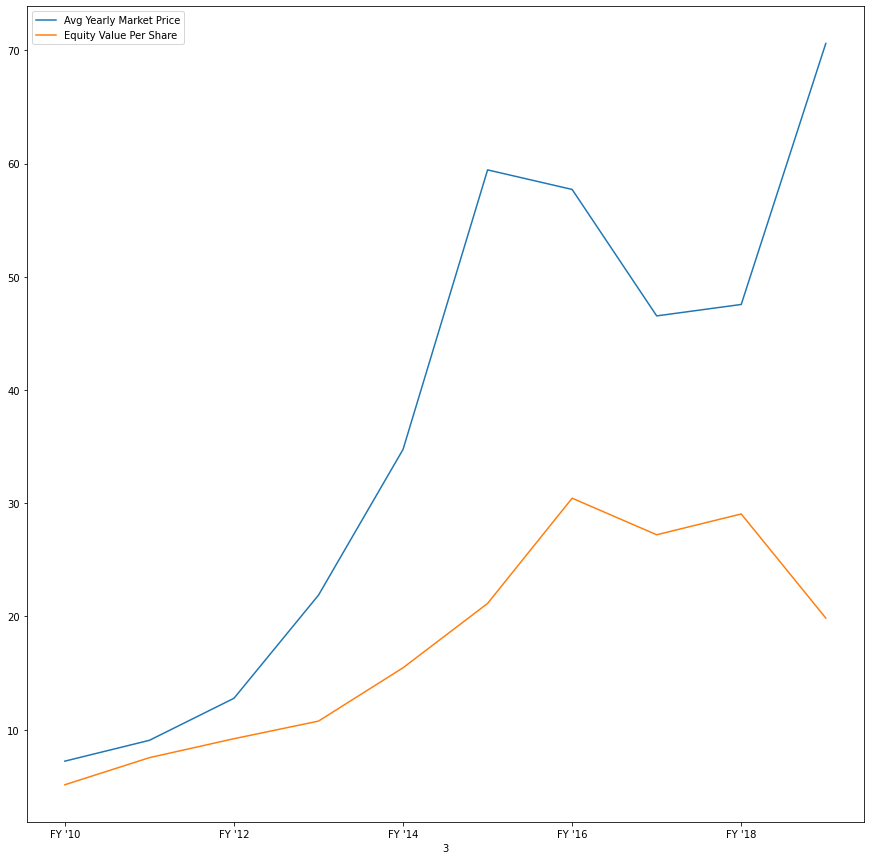

In [0]:
df_plot.plot(figsize=(15,15))

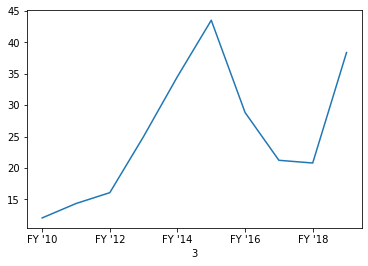

In [0]:
operational_df_PL['EV/FCF'].plot()